# Lab 2 (QMSS5015 Data Analysis)
**Submitted by**: Gideon Tay\
**My UNI**: gt2528\
**Contact me at**: gideon.tay@columbia.edu

## Import libraries, load the data, and convert to wide format
For this lab, I downloaded data from the World Bank's [World Development Index database](https://databank.worldbank.org/source/world-development-indicators). In the csv download, I set missing data as blanks. I downloaded year 2020 data for all 217 countries for the following 3 variables:

- Age dependency ratio (% of working-age population)
- Tax revenue (% of GDP)
- GDP growth (annual %)

In [1]:
# import libraries needed for this lab assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Read csv file from your local computer
df_long = pd.read_csv('worldbank_data.csv')

Since the data is provided in a long format upon download, I also have to convert it to a wide format for easier analysis:

In [2]:
# Convert data from long to wide format
df = df_long.pivot(index = 'Country Name', 
                   columns = 'Series Name', 
                   values = '2020')

# Reset index to make 'Country Name' a column
df.reset_index(inplace=True)

# Rename the columns so it is easier to work with
df.columns = ['country', 'age_dep_ratio', 'gdp_growth', 'tax_revenue']

# View the data
df.head()

,country,age_dep_ratio,gdp_growth,tax_revenue
0,Afghanistan,85.959550,-2.351101,NaN
1,Albania,47.696632,-3.302082,16.983257
2,Algeria,57.889467,-5.000000,NaN
3,American Samoa,53.028094,4.411765,NaN
4,Andorra,37.987924,-11.183940,NaN


## 1-- Recode 2 different variables into new categories. They can both be continuous-ish or both be nominal-ish, or one of each. Tell me what you did and explain the variable(s).

### Recode a continuous-ish variable into categories and explain
Our first variable is **age dependency ratio**. It is the ratio of dependents (people younger than 15 or older than 64) to the working-age population (those ages 15-64). Data are shown as the proportion of dependents per 100 working-age population.

Let's convert this continuous variable (previously given as % of working age population) into a categorical variable with 4 categories:

- Very Low ADR (age_dep_ratio <= 45%)
- Low ADR (45% < age_dep_ratio <= 55%)
- Moderate ADR (55% < age_dep_ratio <= 65%)
- High ADR (65% < age_dep_ratio)

In [3]:
# Define the boundaries for the 4 categories
# No lower limit for the first bin, no upper limit for the last
bins = [-np.inf, 45, 55, 65, np.inf]

# Define the category names
labels = ['Very Low ADR', 'Low ADR', 'Moderate ADR', 'High ADR'] 

# Recode the Age Dependency Ratio into 4 ordinal categories using pd.cut()
df['age_dep_ratio_lvl'] = pd.cut(df['age_dep_ratio'],
                                 bins = bins, 
                                 labels = labels)

# View the output and display in order with sort_index()
df['age_dep_ratio_lvl'].value_counts(dropna=False).sort_index()

age_dep_ratio_lvl
Very Low ADR    41
Low ADR         73
Moderate ADR    46
High ADR        57
Name: count, dtype: int64

To visually confirm that our recoding works, we can produce a boxplot to show how our original `age_dep_ratio` variable relates to the new `age_dep_ratio_lvl` recoded version.

<Axes: xlabel='age_dep_ratio_lvl', ylabel='age_dep_ratio'>

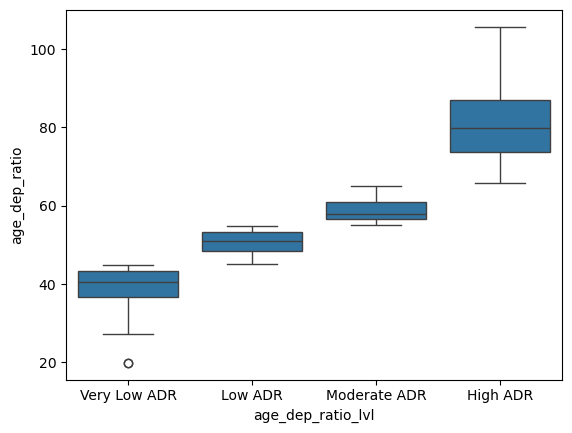

In [4]:
# Plot boxplot of original and recoded variable
sns.boxplot(x = 'age_dep_ratio_lvl', y = 'age_dep_ratio', data = df)

Visually, our recode clearly works. We have created 4 ordinal levels of age dependency ratios. From the distribution, it is clear that for a large proportion of countries, age dependency ratios fall between the narrow 45% and 65% range (the low ADR and moderate ADR categories). This means that most countries have between 45 and 65 dependents for every 100 working-age adults.

There is one country with a very low ADR of about 20, as seen from the outlier in the boxplot, far below even the second lowest ADR country.

### Recode another variable and explain
The second variable we will recode is **tax revenue as a percentage of GDP**. Tax revenue refers to compulsory transfers to the central government for public purposes. Certain compulsory transfers such as fines, penalties, and most social security contributions are excluded. Refunds and corrections of erroneously collected tax revenue are treated as negative revenue.

Again, let's convert this continuous variable (given as % of GDP) into an ordinal categorical variable with 4 categories:

- Very Low Tax Rev (tax_revenue <= 10%)
- Low Tax Rev (10% < tax_revenue <= 15%)
- Moderate Tax Rev (15% < tax_revenue <= 20%)
- High Tax Rev (20% < tax_revenue)


In [5]:
# Define the boundaries for the 4 categories
# No lower limit for the first bin, no upper limit for the last
bins2 = [-np.inf, 10, 15, 20, np.inf]

# Define the category names
labels2 = ['Very Low Tax Rev', 'Low Tax Rev', 
           'Moderate Tax Rev', 'High Tax Rev'] 

# Recode the tax revenue into 4 ordinal categories using pd.cut()
df['tax_revenue_lvl'] = pd.cut(df['tax_revenue'],
                                 bins = bins2, 
                                 labels = labels2)

# View the output and display in order with sort_index()
df['tax_revenue_lvl'].value_counts(dropna=False).sort_index()

tax_revenue_lvl
Very Low Tax Rev    23
Low Tax Rev         40
Moderate Tax Rev    31
High Tax Rev        42
NaN                 81
Name: count, dtype: int64

We have missing values for quite a number of countries (81 countries) in the tax_revenue column. Note that missing values (NaN) are not given a category, and remain as NaN. Let us again visually check that our recoding has worked properly by plotting a boxplot to see how the original `tax_revenue` variable relates to the new `tax_revenue_lvl` recoded version.

<Axes: xlabel='tax_revenue_lvl', ylabel='tax_revenue'>

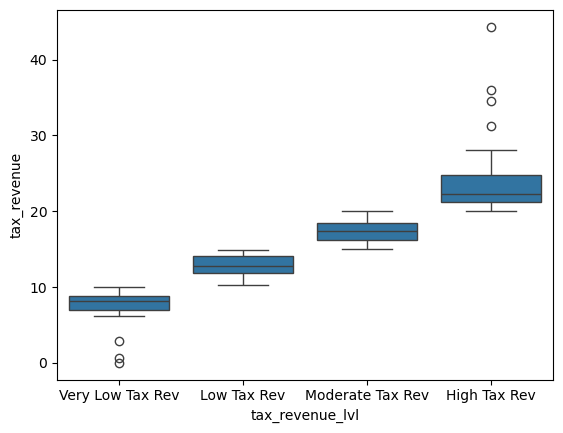

In [6]:
# Plot boxplot of original and recoded variable
sns.boxplot(x = 'tax_revenue_lvl', y = 'tax_revenue', data = df)

Again, with our second variable, the recode appears to check out. There are a few outlier countries: one with tax revenue at >40% GDP (very high), and 3 with tax revenue at <5% GDP (very low). Most of our data points sit within the 5% to 30% range.

## 2-- Use one (or both) of your recoded variables to do a cross-tabulation. Explain your results.
I will use my 2 recoded variables in my cross-tabulation. I expect countries with higher age dependency ratios to have higher tax revenues as a percentage of GDP. Intuitively, if there are more dependents per working-age adult, higher taxes are likely needed to fund greater state expenditure on healthcare costs (for the elderly) as well as social and education costs (for children and young families).

In [7]:
# Cross-tabulate age_dep_ratio_lvl and tax_revenue_lvl
pd.crosstab(df.tax_revenue_lvl, df.age_dep_ratio_lvl, normalize='columns')*100

age_dep_ratio_lvl,Very Low ADR,Low ADR,Moderate ADR,High ADR
tax_revenue_lvl,,,,
Very Low Tax Rev,16.666667,14.893617,16.129032,20.588235
Low Tax Rev,29.166667,25.531915,22.580645,41.176471
Moderate Tax Rev,25.000000,34.042553,16.129032,11.764706
High Tax Rev,29.166667,25.531915,45.161290,26.470588


Let's visualize this cross-tabulation better with a stacked bar chart

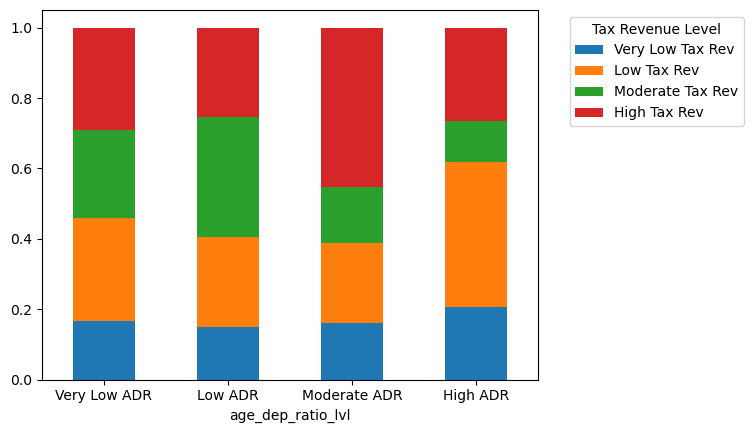

In [8]:
# Drop rows with missing data
df = df.dropna()

# Define the variable names
variables = ['age_dep_ratio_lvl', 'tax_revenue_lvl']

# Group by the variables and count the occurrences
group_counts = df.groupby(variables, observed = False).size()

# Group by the first variable only and count the occurrences
total_counts = df.groupby(variables[0], observed = False).size()

# Calculate the percentage
percentages = group_counts / total_counts

# Unstack and plot the data
chart = percentages.unstack().plot(kind='bar', stacked=True)

# Move the legend outside the plot
chart.legend(title='Tax Revenue Level', 
             bbox_to_anchor=(1.05, 1), 
             loc='upper left')

# Tilt the x-axis labels
plt.xticks(rotation=0)

# Show the plot
plt.show()

The cross-tabulation does not show any clear pattern, unlike what I initially expected or hypothesized. I initially expected the red bar to grow larger while the blue bar to grow smalller as age dependency ratio increases. Instead, we observe that moderate ADR has the largest red bar, and high ADR has the largest blue bar.

Perhaps this suggests that my initial thought process is a little too simplistic. While countries with higher age dependency ratios may have higher relative social, healthcare, and education expenditure to care for the young and elderly, perhaps this may be funded through means other than high taxes. 

- Countries may borrow to spend, rather than raise taxes. Recently, we have seen growing sovereign debt levels globally.
- Countries may have large financial reserves (Singapore) or government revenue from natural resources (Norway, Saudi Arabia, and Brunei's oil) which can be an alternative source of funding for government spending besides taxes

Another possibility is that our large number of missing data points for 81 countries' tax revenue has prevented us from observing the true distribution. This is possible if there is a systematic reason behind why these specific country's data are missing, rather than a random one.

## 3-- Run a correlation of one variable with another variable; make all of the recodes necessary to make the correlation as easy to interpret as possible; and explain your results.

I will investigate the correlation between tax revenue (% of GDP) and GDP growth (annual %). I expect that countries with high tax revenues as a percentage of GDP would have lower growth. 

Intuitively, taxes disincentivizes economic activity. Corporate taxes reduce the incentive for private sector investment, value added tax (VAT) reduces consumption, income tax reduces the incentive to work, and payroll tax reduces the incentive for firms to hire. Hence, I expect higher tax levels to correlate with lower growth.

No recode is necessary since `tax_revenue` and `gdp_growth` columns are continuous variables which allow correlation to be conducted on them easily, and we have already dropped all rows with NaN values.

In [9]:
# calculate the Pearson correlation
df['tax_revenue'].corr(df['gdp_growth'])

-0.15584156346630249

As expected, there is a negative correlation between tax revenue as a percentage of GDP and annual percentage GDP growth. Note that this correlation is rather weak in magnitude. In practice, many other variables including external global macroeconomic factors affect GDP growth, so it is difficult for any single variable to correlate very strongly with GDP growth.

## 4-- Identify the most extreme cases on some variable.  Interpret the results.

I was curious which countries had highest and lowest age dependency ratio. Let's explore:

In [10]:
# Get the 5 highest age dependency ratio, along with the country name
df[['country', 'age_dep_ratio']] \
    .dropna() \
    .sort_values(by = 'age_dep_ratio', ascending = False) \
    .head(5)

,country,age_dep_ratio
37,Central African Republic,102.787588
122,Mali,100.416318
176,Somalia,99.822375
44,"Congo, Dem. Rep.",97.998792
31,Burundi,96.800030


The top five countries with the highest age dependency ratios are the CAR, Mali, Somalia, DRC, and Burundi. These are all African countries.

This can be explained by the higher fertility rates in these nations producing a high population of children younger than 15 that drive up the age dependency ratio. Although this means high childcare costs for now, it could be a positive tailwind for these countries' future economic growth, as it suggests rapid growth in workforce size and labour 2 decades down the line.

In [11]:
# Get the 5 lowest age dependency ratio, along with the country name
df[['country', 'age_dep_ratio']] \
    .dropna() \
    .sort_values(by = 'age_dep_ratio', ascending = True) \
    .head(5)

,country,age_dep_ratio
204,United Arab Emirates,19.896833
14,Bahrain,30.712222
171,Singapore,33.879591
117,"Macao SAR, China",35.161646
121,Maldives,35.452564


The bottom five countries with lowest age dependency ratios are the UAE, Bahrain, Singapore, Macao SAR, and Maldives. These are all countries in Asia and the Middle East. Low age dependency ratios means that most of the population are of working age and can contribute to the economy. 

However, for countries like UAE and Singapore, low age dependency ratios are partially attributed to low fertility rates. Decades down the line, these countries may have issues with an aging population as the large working age population retires and there are insufficient youth that grow into working age.